## TITANIC Survival Prediction

 **Goal:**
 - To predict which passengers survived the Titanic disaster using their demographic and travel features.



In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [101]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [102]:
df = df.drop(['PassengerId', 'Ticket','Cabin'], axis=1)



`PassengerId` → just an identifier, no predictive value.

`Ticket` → mostly random alphanumeric; not useful.

`Name` → raw form is unhelpful, but later we can extract Title (Mr, Mrs, Miss, etc.), which is predictive.

In [103]:
# Fill missing Age with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])




In [104]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [105]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [106]:
df.duplicated().sum()

np.int64(0)

In [107]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [117]:
df_num = df.select_dtypes(include=['int','float']).columns.tolist()
df_cat = df.select_dtypes(include=['object']).columns.tolist()
print(df_num)
print(df_cat)

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Name', 'Sex', 'Embarked']


## Univariate Analysis

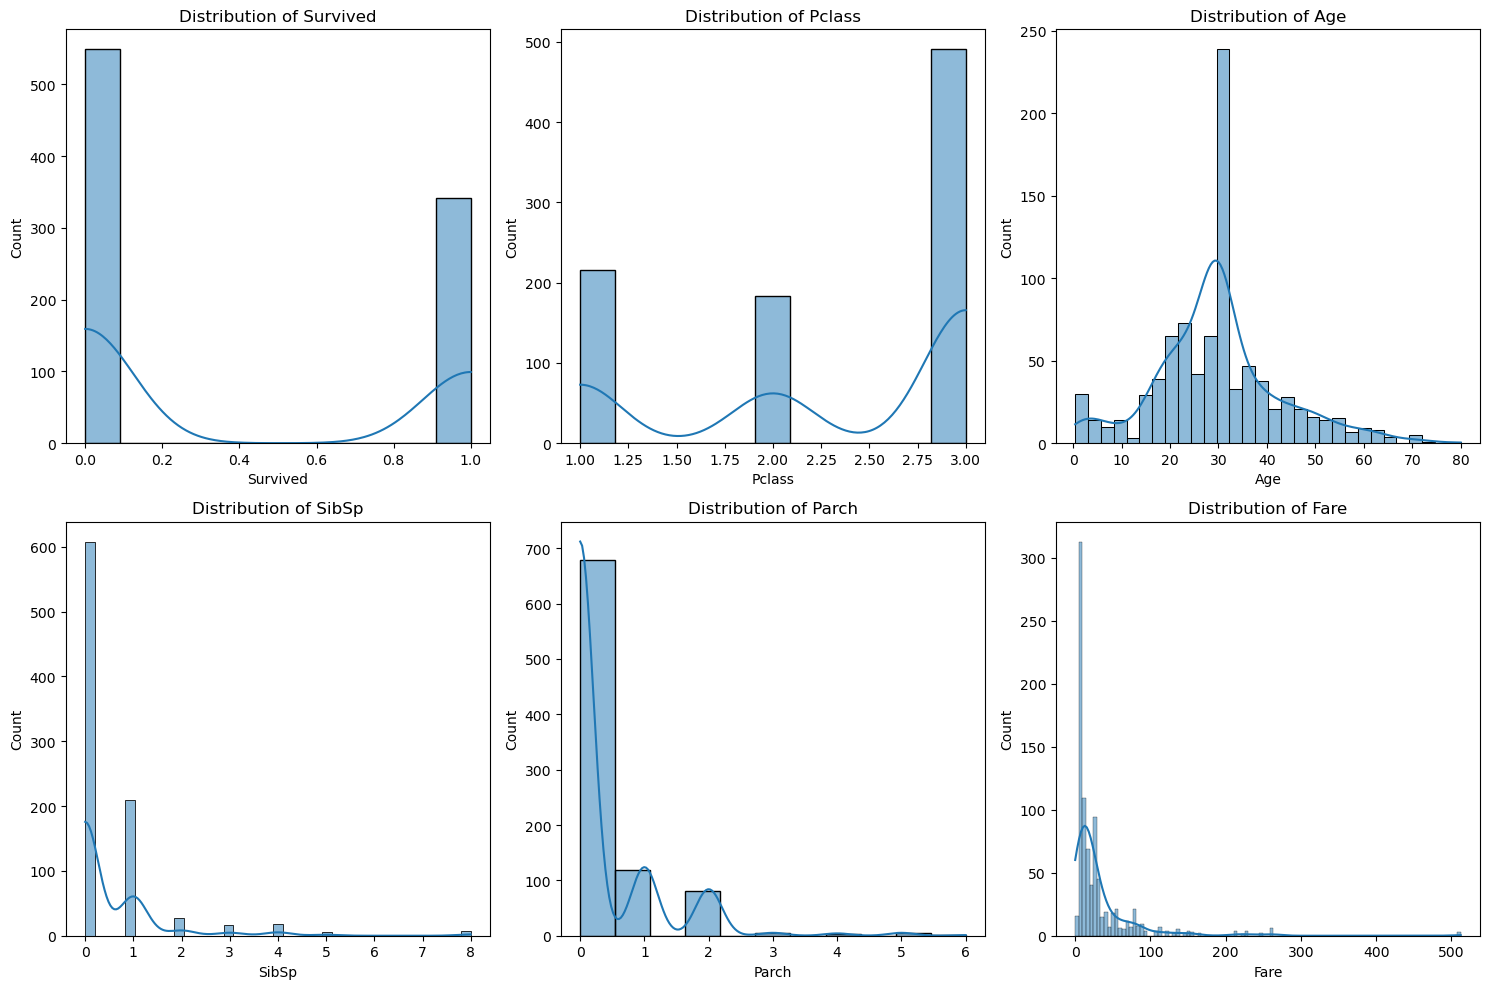

In [118]:
# Visualizing the distribution of numerical features
import math

n_cols = 3
n_rows = math.ceil(len(df_num) / n_cols)


fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(df_num):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)

# Hide extra unused axes
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Univariate Analysis — Numerical Features

We visualized the distribution of all numerical features in the Titanic dataset:

- **Survived**: The target variable is imbalanced — a larger proportion of passengers did not survive.
- **Pclass**: Most passengers were in 3rd class, followed by 1st class, and then 2nd class.
- **Age**: Right-skewed distribution; most passengers were between 20–40 years old, with fewer children and elderly passengers.
- **SibSp**: Majority of passengers had no siblings/spouses aboard (0), with a small number having 1–2, and very few having more.
- **Parch**: Most passengers had no parents/children aboard (0), with some having 1–2, and very few having more.
- **Fare**: Strongly right-skewed; most fares were low, with a small number of very high fares (outliers).

**Key Insights:**
- Features such as **Pclass**, **Age**, and **Fare** show clear variability, which might be predictive of survival.
- Skewness in **Fare** may require transformation for certain models.
- Imbalance in **Survived** will need to be considered during model training and evaluation.


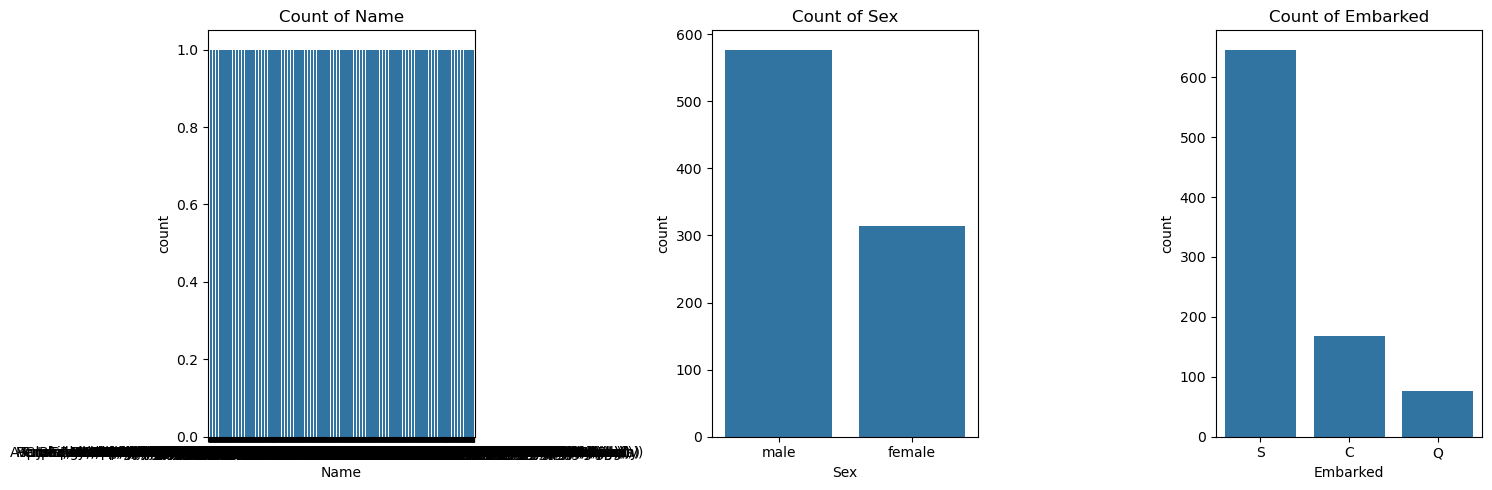

In [119]:
n_cols = 3
n_rows = math.ceil(len(df_cat) / n_cols)

fig,axes = plt.subplots(n_rows, n_cols, figsize=( 5*n_cols , 5 * n_rows))
axes = axes.flatten()

for i ,col in enumerate(df_cat):
    sns.countplot(data = df, x=col, ax=axes[i])
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel(col)
for j in range(i+1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

## Bi-variate Analysis

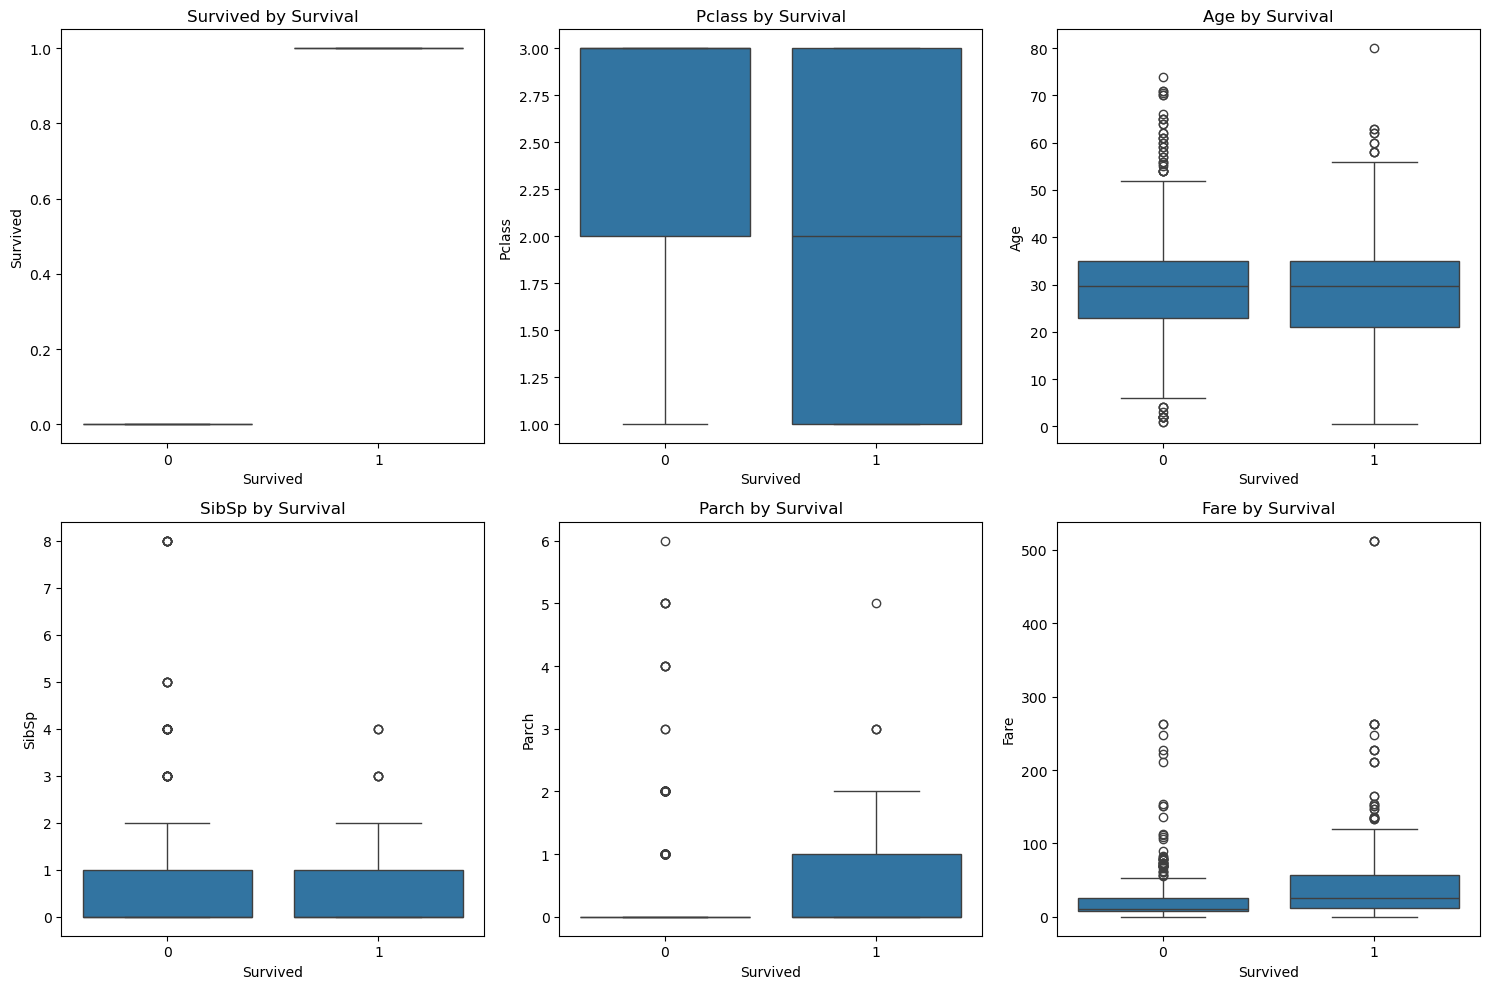

In [120]:
n_cols = 3
n_rows = math.ceil(len(df_num) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(df_num):
    
    sns.boxplot(data=df, x='Survived', y=col, ax=axes[i])
    axes[i].set_title(f'{col} by Survival')
    axes[i].set_xlabel('Survived')
    axes[i].set_ylabel(col)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


## Bivariate Analysis — Numerical Features vs Survival

We compared the distribution of each numerical feature across the two survival classes (0 = did not survive, 1 = survived) using boxplots.

**Key Observations:**
- **Pclass**: Survivors were more likely to be in 1st class, while non-survivors were concentrated in 3rd class.
- **Age**: Median age is similar for both survivors and non-survivors, though slightly more younger passengers survived.
- **SibSp**: Most passengers in both groups had few or no siblings/spouses on board; extreme values are rare.
- **Parch**: Majority had no parents/children aboard; passengers with 1–2 parents/children had slightly better survival rates.
- **Fare**: Survivors generally paid higher fares, indicating a possible link with cabin class and survival chances.

**Insights for Modeling:**
- `Pclass` and `Fare` appear to have strong discriminatory power.
- `SibSp` and `Parch` may be useful after feature engineering (e.g., `FamilySize`).
- `Age` shows limited separation, but interactions with other features could add value.


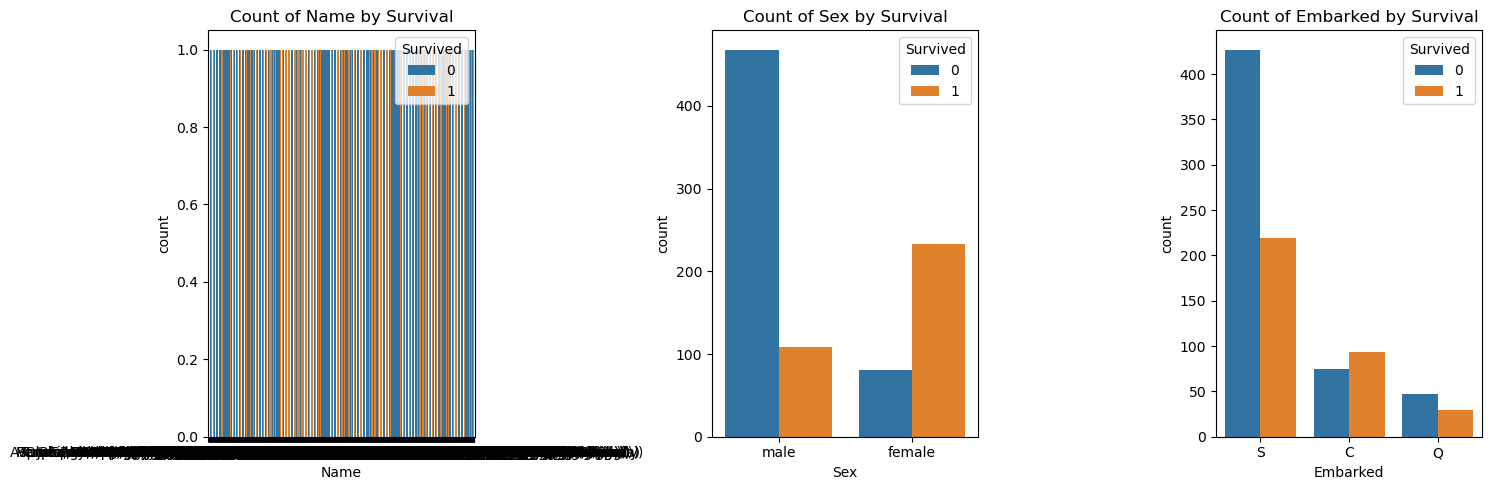

In [121]:


n_cols = 3
n_rows = math.ceil(len(df_cat) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(df_cat):
    sns.countplot(data=df, x=col, hue='Survived', ax=axes[i])
    axes[i].set_title(f'Count of {col} by Survival')
    axes[i].set_xlabel(col)

# Hide unused axes
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


## Bivariate Analysis — Categorical Features vs Survival

We examined how categorical features relate to survival by comparing counts of survivors (1) and non-survivors (0) in each category.

**Key Observations:**
- **Sex**: Survival rate among females is significantly higher than among males. Most males did not survive, while the majority of females did.
- **Embarked**:
  - Passengers embarking from **Cherbourg (C)** had the highest survival proportion.
  - Those from **Southampton (S)** had the largest passenger group but a lower survival rate.
  - **Queenstown (Q)** had the smallest passenger group, with the lowest survival proportion.

**Insights for Modeling:**
- `Sex` is a strong predictor of survival.
- `Embarked` may be useful, particularly when combined with `Pclass` and `Fare`.


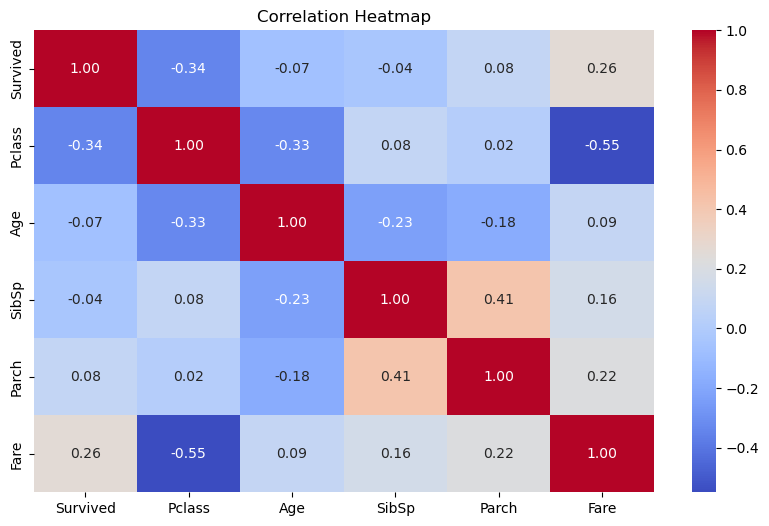

In [122]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[df_num].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Correlation Analysis

We computed the Pearson correlation between all numerical features in the dataset.

**Key Observations:**
- **Survived**:
  - Negatively correlated with `Pclass` (-0.34): Passengers in higher classes had better survival rates.
  - Positively correlated with `Fare` (+0.25): Higher fares are linked to greater survival likelihood.
  - Weak correlation with other features (`Age`, `SibSp`, `Parch`).
- **Pclass**:
  - Strong negative correlation with `Fare` (-0.55), as expected — higher classes paid more.
  - Moderate negative correlation with `Age` (-0.34), indicating older passengers were more common in higher classes.
- **SibSp` and `Parch`**:
  - Positively correlated with each other (+0.38), consistent with family members traveling together.

**Insights for Modeling:**
- `Pclass` and `Fare` are potentially important predictors.
- `SibSp` and `Parch` may be combined into a derived feature like `FamilySize`.
- Most correlations with `Survived` are weak to moderate, so a combination of features (and non-linear models) will likely perform best.


In [123]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [124]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['Title'] = df['Title'].replace(
    ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 
     'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare'
)


In [125]:
df.groupby('Title')['Survived'].mean().sort_values(ascending=False)


Title
Mrs       0.793651
Miss      0.702703
Master    0.575000
Rare      0.347826
Mr        0.156673
Name: Survived, dtype: float64

In [128]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,2,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,2,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,1,1


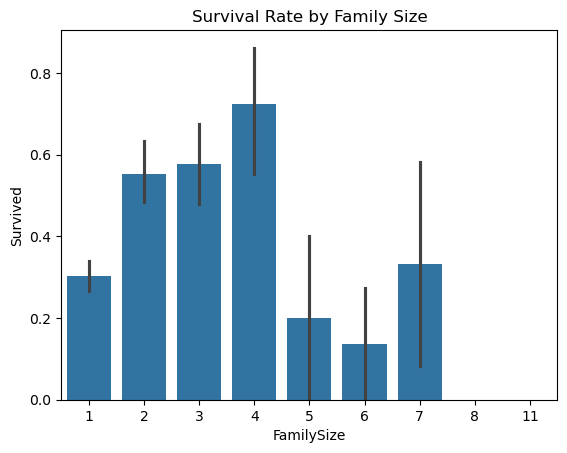

In [129]:
sns.barplot(data=df, x='FamilySize', y='Survived', estimator=np.mean)
plt.title('Survival Rate by Family Size')
plt.show()

#### Observations:

Family `size 2–4` → highest survival rates (peaks around 3–4).

Alone `(size = 1)` → much lower survival rate (~27%).

Large families ` size (≥5)` → survival drops sharply.

Very large families `size (7, 8, 11)` → few samples, survival is inconsistent.

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression



X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


num_features = X.select_dtypes(include=['int', 'float']).columns
cat_features = X.select_dtypes(include=['object']).columns




In [149]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

In [159]:
lg_model = Pipeline( 
    steps = [
        ('preprocessor', preprocessor), 
        ('classifier' , LogisticRegression(max_iter=1000, random_state=42))
    ]
 )

lg_model .fit(X_train, y_train)

lg_predictions = lg_model.predict(X_test)

print("Logistic Regression Model Accuracy:", accuracy_score(y_test, lg_predictions))
print("Classification Report:\n", classification_report(y_test, lg_predictions))

Logistic Regression Model Accuracy: 0.8156424581005587
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [163]:
from xgboost import XGBClassifier

xgb_model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier( n_estimators=200,
            learning_rate=0.05,
            max_depth=4,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            eval_metric='logloss'))
    ]
)

xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

print("XGBoost Model Accuracy:", accuracy_score(y_test, xgb_predictions))
print("Classification Report:\n", classification_report(y_test, xgb_predictions))

XGBoost Model Accuracy: 0.8324022346368715
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       105
           1       0.81      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



## Model Performance Comparison

We evaluated two models — **Logistic Regression** (baseline) and **XGBoost** (gradient boosting ensemble) — using the same preprocessing pipeline.

### **1. Logistic Regression**
- **Accuracy:** 81.56%
- **Precision / Recall (Class 0 — Did Not Survive):**
  - Precision: 0.84
  - Recall: 0.85
- **Precision / Recall (Class 1 — Survived):**
  - Precision: 0.78
  - Recall: 0.77
- **Observations:**
  - Balanced performance between classes.
  - Slightly lower recall for survivors, meaning some survivors were misclassified as non-survivors.

### **2. XGBoost**
- **Accuracy:** 83.24%
- **Precision / Recall (Class 0 — Did Not Survive):**
  - Precision: 0.85
  - Recall: 0.87
- **Precision / Recall (Class 1 — Survived):**
  - Precision: 0.81
  - Recall: 0.78
- **Observations:**
  - Improved overall accuracy compared to Logistic Regression (+1.68%).
  - Higher recall for non-survivors and improved precision for survivors.
  - Still some recall drop for survivors, but better overall balance.

### **Conclusion:**
- XGBoost outperformed Logistic Regression in overall accuracy and precision.
- Both models show reasonable balance between precision and recall, but further feature engineering and hyperparameter tuning may improve survivor recall.
- Next steps could include:
  - Adding engineered features (`Title`, `FamilySize`, `IsAlone`).
  - Hyperparameter tuning for XGBoost.
  - Trying other ensemble methods such as Random Forest or LightGBM.
